   0    1         2   3    4   5   6   7   8   9   ...    33    34    35   36  \
0   0  tcp  ftp_data  SF  491   0   0   0   0   0  ...  0.17  0.03  0.17  0.0   
1   0  udp     other  SF  146   0   0   0   0   0  ...  0.00  0.60  0.88  0.0   
2   0  tcp   private  S0    0   0   0   0   0   0  ...  0.10  0.05  0.00  0.0   

    37   38    39   40       41  42  
0  0.0  0.0  0.05  0.0   normal  20  
1  0.0  0.0  0.00  0.0   normal  15  
2  1.0  1.0  0.00  0.0  neptune  19  

[3 rows x 43 columns]
Read 125973 rows.

Analyzing: KDDTrain+.csv
125972 rows
** 0:2981 (2%)
** tcp:[tcp:81.52%,udp:11.9%,icmp:6.58%]
** ftp_data:[http:32.02%,private:17.35%,domain_u:7.18%,smtp:5.81%,ftp_data:5.44%,eco_i:3.64%,other:3.46%,ecr_i:2.44%,telnet:1.87%,finger:1.4%,ftp:1.39%,auth:0.76%,Z39_50:0.68%,uucp:0.62%,courier:0.58%,bgp:0.56%,whois:0.55%,uucp_path:0.55%,iso_tsap:0.55%,time:0.52%,imap4:0.51%,nnsp:0.5%,vmnet:0.49%,urp_i:0.48%,domain:0.45%,ctf:0.45%,csnet_ns:0.43%,supdup:0.43%,discard:0.43%,http_443:0.4

Train on 94479 samples, validate on 31494 samples
Epoch 1/1000
 - 4s - loss: 0.7580 - acc: 0.8085 - val_loss: 0.3844 - val_acc: 0.8785
Epoch 2/1000
 - 4s - loss: 0.3183 - acc: 0.9009 - val_loss: 0.2775 - val_acc: 0.9054
Epoch 3/1000
 - 4s - loss: 0.2503 - acc: 0.9229 - val_loss: 0.2365 - val_acc: 0.9403
Epoch 4/1000
 - 4s - loss: 0.2197 - acc: 0.9433 - val_loss: 0.2170 - val_acc: 0.9468
Epoch 5/1000
 - 4s - loss: 0.2012 - acc: 0.9489 - val_loss: 0.1997 - val_acc: 0.9474
Epoch 6/1000
 - 4s - loss: 0.1899 - acc: 0.9506 - val_loss: 0.1925 - val_acc: 0.9524
Epoch 7/1000
 - 4s - loss: 0.1823 - acc: 0.9541 - val_loss: 0.1869 - val_acc: 0.9516
Epoch 8/1000
 - 4s - loss: 0.1777 - acc: 0.9566 - val_loss: 0.1888 - val_acc: 0.9551
Epoch 9/1000
 - 4s - loss: 0.1725 - acc: 0.9587 - val_loss: 0.1830 - val_acc: 0.9527
Epoch 10/1000
 - 4s - loss: 0.1703 - acc: 0.9588 - val_loss: 0.1875 - val_acc: 0.9562
Epoch 11/1000
 - 4s - loss: 0.1681 - acc: 0.9593 - val_loss: 0.1772 - val_acc: 0.9599
Epoch 12/1000

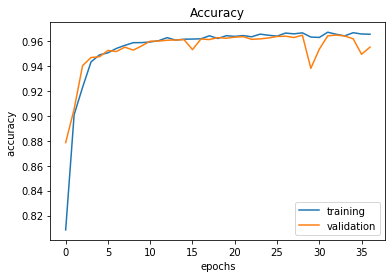

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0     0     0   206     0     0
      0     0     0    15     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0     0     9     0     0
      0     0     0     1     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     3     1     0     0
      0     7     0     2     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     2     1     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0   514     0     0     0   329     2     0     0
      0    71     0     2     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     4     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0

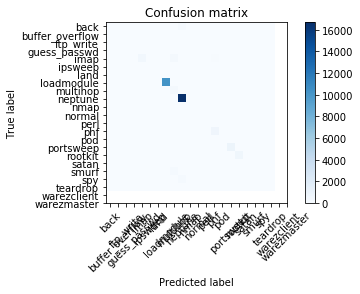

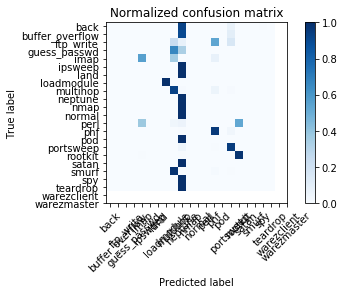

In [2]:
import pandas as pd
import io
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow.contrib.learn as skflow
import string

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
%matplotlib inline

path = "KDDTrain+.csv"
# This file is a CSV, just no CSV extension or headers
df = pd.read_csv(path, header=None)
print(df[0:3])

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to sample only 10% of the dataset
df.dropna(inplace=True,axis=1) # For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'algo_borrar'
]

df.drop('algo_borrar', 1, inplace=True)

ENCODING = 'utf-8'

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename,encoding=ENCODING)
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

analyze(path)


# display 5 rows
df[0:5]

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

#Clean 'date' column and convert to Int type
def clean_date(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_removed = s.replace(" ", "")
    s_int = int(s_removed)
    return s_int

########## CLEAN IP #######################
def clean_ip(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    s_int = int(s)
    return s_int

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

#MINMAX -1 1
# Encode a column to a range between normalized_low and normalized_high.
def min_max_1(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

#MINMAX 0 1
def min_max_0(df, name, normalized_low=0, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

    
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Now encode the feature vector

min_max_1(df, 'duration')
encode_text_dummy(df, 'protocol_type')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'flag')
min_max_1(df, 'src_bytes')
min_max_1(df, 'dst_bytes')
encode_text_dummy(df, 'land')
min_max_1(df, 'wrong_fragment')
min_max_1(df, 'urgent')
min_max_1(df, 'hot')
min_max_1(df, 'num_failed_logins')
encode_text_dummy(df, 'logged_in')
min_max_1(df, 'num_compromised')
min_max_1(df, 'root_shell')
min_max_1(df, 'su_attempted')
min_max_1(df, 'num_root')
min_max_1(df, 'num_file_creations')
min_max_1(df, 'num_shells')
min_max_1(df, 'num_access_files')
min_max_1(df, 'num_outbound_cmds')
encode_text_dummy(df, 'is_host_login')
encode_text_dummy(df, 'is_guest_login')
min_max_1(df, 'count')
min_max_1(df, 'srv_count')
min_max_1(df, 'serror_rate')
min_max_1(df, 'srv_serror_rate')
min_max_1(df, 'rerror_rate')
min_max_1(df, 'srv_rerror_rate')
min_max_1(df, 'same_srv_rate')
min_max_1(df, 'diff_srv_rate')
min_max_1(df, 'srv_diff_host_rate')
min_max_1(df, 'dst_host_count')
min_max_1(df, 'dst_host_srv_count')
min_max_1(df, 'dst_host_same_srv_rate')
min_max_1(df, 'dst_host_diff_srv_rate')
min_max_1(df, 'dst_host_same_src_port_rate')
min_max_1(df, 'dst_host_srv_diff_host_rate')
min_max_1(df, 'dst_host_serror_rate')
min_max_1(df, 'dst_host_srv_serror_rate')
min_max_1(df, 'dst_host_rerror_rate')
min_max_1(df, 'dst_host_srv_rerror_rate')
outcomes = encode_text_index(df, 'outcome')
num_classes = len(outcomes)

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]


##################################################
# Break into X (predictors) & y (prediction)
x, y = to_xy(df,'outcome')
#################################################



# Create a test/train split.  25% test
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)


# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

print(outcomes)

### PLOT ACCURACY ####

plt.plot(np.arange(len(history.history['acc'])),
history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])),
history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()

### PLOT CONFUSION MATRIX ###

# Not normalized
cm = confusion_matrix(y_eval, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, outcomes, title='Normalized confusion matrix')

plt.show()